In [17]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
all_data = pd.merge(mouse_data, trial_data, on="Mouse ID", how = "left")

# Display the data table for preview
all_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [18]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_data1 = all_data.groupby(["Drug", "Timepoint"])

mean_tumor_data = group_data1["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_response_df = pd.DataFrame(mean_tumor_data).reset_index()

# Preview DataFrame
tumor_response_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [19]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mean_tumor_data_err = group_data1["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_data_stderr_df = pd.DataFrame(mean_tumor_data_err).reset_index()

# Preview DataFrame
tumor_data_stderr_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [20]:
# Minor Data Munging to Re-Format the Data Frames
mung_tumor_response_df = tumor_response_df.pivot(index ="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
mung_tumor_response_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


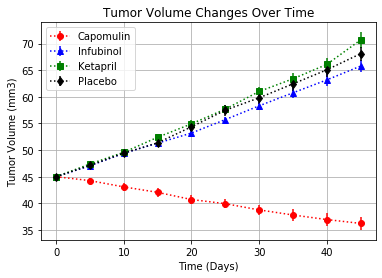

In [21]:
# Generate the Plot (with Error Bars) "Tumor Volume Changes Over Time"

# Save the Figure
Capomulin_error = tumor_data_stderr_df.loc[tumor_data_stderr_df["Drug"] == "Capomulin", "Tumor Volume (mm3)"]

Infubinol_error = tumor_data_stderr_df.loc[tumor_data_stderr_df["Drug"] == "Infubinol", "Tumor Volume (mm3)"]

Ketapril_error = tumor_data_stderr_df.loc[tumor_data_stderr_df["Drug"] == "Ketapril", "Tumor Volume (mm3)"]

Placebo_error = tumor_data_stderr_df.loc[tumor_data_stderr_df["Drug"] == "Placebo", "Tumor Volume (mm3)"]


Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


plt.errorbar(Time, mung_tumor_response_df["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='dotted')

plt.errorbar(Time, mung_tumor_response_df["Infubinol"] ,yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='dotted')

plt.errorbar(Time, mung_tumor_response_df["Ketapril"] ,yerr= Ketapril_error, label= "Ketapril", marker= "s", color="green", linestyle='dotted')

plt.errorbar(Time, mung_tumor_response_df["Placebo"] , yerr= Placebo_error, label= "Placebo", marker= "d", color="black", linestyle='dotted')


plt.legend()
plt.title("Tumor Volume Changes Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

plt.savefig("Tumor_Volume_Changes_Over_Time_plot.png")

plt.show()




## Metastatic Response to Treatment

In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_data2 = all_data.groupby(["Drug", "Timepoint"])

mean_met_site_data = group_data2["Metastatic Sites"].mean()

# Convert to DataFrame

met_site_mean_df = pd.DataFrame(mean_met_site_data).reset_index()

# Preview DataFrame
met_site_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

mean_metsite_stderr = group_data2["Metastatic Sites"].sem()

# Convert to DataFrame
metsite_stderr_df = pd.DataFrame(mean_metsite_stderr).reset_index()

# Preview DataFrame
metsite_stderr_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [24]:
# Minor Data Munging to Re-Format the Data Frames
mung_metsite_data = met_site_mean_df.pivot(index = "Timepoint", columns ="Drug", values ="Metastatic Sites")

mung_metsite_data


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


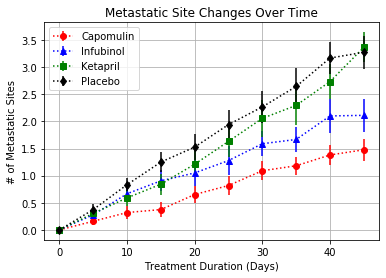

In [25]:
# Generate the Plot (with Error Bars) METASTATIC PLOT
Capomulin_error = metsite_stderr_df.loc[metsite_stderr_df["Drug"] == "Capomulin", "Metastatic Sites"]
Infubinol_error = metsite_stderr_df.loc[metsite_stderr_df["Drug"] == "Infubinol", "Metastatic Sites"]
Ketapril_error = metsite_stderr_df.loc[metsite_stderr_df["Drug"] == "Ketapril", "Metastatic Sites"]
Placebo_error = metsite_stderr_df.loc[metsite_stderr_df["Drug"] == "Placebo", "Metastatic Sites"]

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


plt.errorbar(Time, mung_metsite_data["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='dotted')
plt.errorbar(Time, mung_metsite_data["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='dotted')
plt.errorbar(Time, mung_metsite_data["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "s", color="green", linestyle='dotted')
plt.errorbar(Time, mung_metsite_data["Placebo"] , yerr= Placebo_error, label= "Placebo", marker= "d", color="black", linestyle='dotted')

plt.legend()
plt.title("Metastatic Site Changes Over Time")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("# of Metastatic Sites")
plt.grid()





# Save the Figure
plt.savefig("Metastatic_Site_Changes_Over_Time_plot.png")

# Show the Figure
plt.show()



## Survival Rates

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group_data3 = all_data.groupby(["Drug", "Timepoint"])

mice_count_data = group_data3["Mouse ID"].count()

# Convert to DataFrame
mice_count_data_df = pd.DataFrame(mice_count_data).reset_index()

# Preview DataFrame
mice_count_data_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [27]:
# Minor Data Munging to Re-Format the Data Frames
mung_mice_count_df = mice_count_data_df.pivot(index ="Timepoint", columns="Drug", values="Mouse ID")

# Preview the Data Frame
mung_mice_count_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


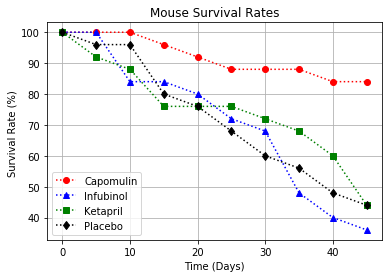

In [28]:
# Generate the Plot (Accounting for percentages)
plt.plot(Time, (mung_mice_count_df["Capomulin"]/25)*100 , label= "Capomulin", marker= "o", color="red", linestyle='dotted')
plt.plot(Time, (mung_mice_count_df["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color="blue", linestyle='dotted')
plt.plot(Time, (mung_mice_count_df["Ketapril"]/25)*100 , label= "Ketapril", marker= "s", color="green", linestyle='dotted')
plt.plot(Time, (mung_mice_count_df["Placebo"]/25)*100 , label= "Placebo", marker= "d", color="black", linestyle='dotted')
plt.legend()
plt.title("Mouse Survival Rates")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")
plt.grid()

# Save the Figure
plt.savefig("Mouse_Survival_Rates_plot.png")

# Show the Figure
plt.show()


## Summary Bar Graph

In [29]:
# Calculate the percent changes for each drug
Intial_tumor_volume = 45
Percent_Change = ((mung_tumor_response_df.loc[45, :] - Intial_tumor_volume)/Intial_tumor_volume)*100

# Display the data to confirm
print(Percent_Change)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64


In [30]:
# Store all Relevant Percent Changes into a Tuple
tuple_Percent_Change = tuple(zip(Percent_Change.index, Percent_Change))
tuple_Percent_Change_list = list(tuple_Percent_Change)
tuple_Percent_Change_list


[('Capomulin', -19.475302667894173),
 ('Ceftamin', 42.51649185589744),
 ('Infubinol', 46.12347172785187),
 ('Ketapril', 57.028794686606076),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315153),
 ('Propriva', 47.24117486320637),
 ('Ramicane', -22.320900462766673),
 ('Stelasyn', 52.085134287899024),
 ('Zoniferol', 46.57975086509525)]

In [31]:
# Splice the data between passing and failing drugs
passing_drugs_list = []
failing_drugs_list = []
index_passing_drugs_list = []
index_failing_drugs_list = []
for j,elements in tuple_Percent_Change_list :
    if elements > 0 :
        passing_drug = elements
        passing_drugs_list.append(elements)
        index_passing_drugs_list.append(j)
    else :
        failing_drugs = elements
        failing_drugs_list.append(elements)
        index_failing_drugs_list.append(j)
passing_drugs = list(zip(index_passing_drugs_list, passing_drugs_list))
failing_drugs = list(zip(index_failing_drugs_list, failing_drugs_list))

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

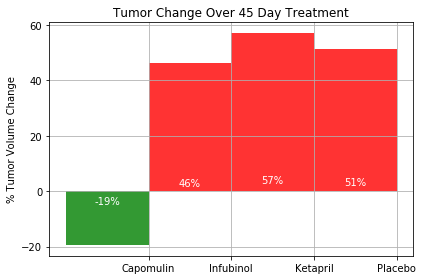

In [32]:
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
y_value1 = [Percent_Change["Infubinol"], Percent_Change["Ketapril"], Percent_Change["Placebo"]]
x_axis1 = [0]
x_axis2 = [1, 2, 3]


bars1 = ax.bar(x_axis1, Percent_Change["Capomulin"], color='g', alpha=0.8, align="edge", width = -1)
bars2 = ax.bar(x_axis2, y_value1 , color='r', alpha=0.8, align="edge", width = -1)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
        yticks=[-20, 0, 20, 40, 60])
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.grid()

# Use functions to label the percentages of changes

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha='center', va='top', color="white")

# Call functions to implement the function calls

autolabel(bars1)
autolabel(bars2)
fig.tight_layout()


# Save the Figure
plt.savefig("Percentage_Tumor_Volume_Change_bar.png")

# Show the Figure
fig.show